In [1]:
# import libraries
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# install lightgbm
!pip install -U lightgbm

# upload and load dataset
uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/")

csv_file = [f for f in os.listdir("/content/") if f.endswith(".csv")][0]
df = pd.read_csv("/content/" + csv_file)

print("Dataset Loaded Successfully!")
print(df.head(), "\n")
print(df.info(), "\n")

# fill missing values
df = df.ffill()

# remove high-leakage columns
df = df.drop(columns=[
    "Patient_ID", "Function", "Effect", "Gene/Factor",
    "Chromosome_Location", "Random_Protein_Sequence",
    "Random_Gene_Sequence"
], errors='ignore')

# label encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include="object"):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# prepare features
X = df.drop(columns=["Motor_Symptoms","Disease_Stage","Category"])
y_targets = ["Motor_Symptoms","Disease_Stage","Category"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# import lightgbm
import lightgbm as lgb

results = []

# define function to train and evaluate model
def run_lgbm(target):
    print(f"\nTraining LightGBM for: {target}")

    y = df[target]

    # initialize and train model
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_scaled, y)

    # predict on full dataset
    y_pred = model.predict(X_scaled)

    # calculate metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - LightGBM ({target})")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()

    # store results


Saving archive (3).zip to archive (3).zip
Dataset Loaded Successfully!
                             Patient_ID  Age     Sex Family_History  \
0  b2a49170-8561-4665-9371-2240b55dd87a   31    Male             No   
1  f5fae45d-8718-41c4-a957-6928f79f3c8e   33  Female            Yes   
2  66ab0567-050b-4d56-9ec4-b676309899a6   69    Male            Yes   
3  996a48e4-e841-418f-a539-5a7a86cd815d   66    Male            Yes   
4  d45c7ca8-7125-4aaa-8018-5bbc60d35a1f   43  Female            Yes   

   HTT_CAG_Repeat_Length Motor_Symptoms Cognitive_Decline  Chorea_Score  \
0                     67       Moderate            Severe          8.80   
1                     38         Severe          Moderate          3.24   
2                     37         Severe          Moderate          1.01   
3                     50           Mild            Severe          3.21   
4                     48       Moderate              Mild          2.31   

   Brain_Volume_Loss  Functional_Capacity  ... HTT_

Saving archive (3).zip to archive (3) (1).zip
Dataset Loaded Successfully!

                             Patient_ID  Age     Sex Family_History  \
0  b2a49170-8561-4665-9371-2240b55dd87a   31    Male             No   
1  f5fae45d-8718-41c4-a957-6928f79f3c8e   33  Female            Yes   
2  66ab0567-050b-4d56-9ec4-b676309899a6   69    Male            Yes   
3  996a48e4-e841-418f-a539-5a7a86cd815d   66    Male            Yes   
4  d45c7ca8-7125-4aaa-8018-5bbc60d35a1f   43  Female            Yes   

   HTT_CAG_Repeat_Length Motor_Symptoms Cognitive_Decline  Chorea_Score  \
0                     67       Moderate            Severe          8.80   
1                     38         Severe          Moderate          3.24   
2                     37         Severe          Moderate          1.01   
3                     50           Mild            Severe          3.21   
4                     48       Moderate              Mild          2.31   

   Brain_Volume_Loss  Functional_Capacity  ...

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.5749
Precision: 0.5764
Recall: 0.5749
F1 Score: 0.5744


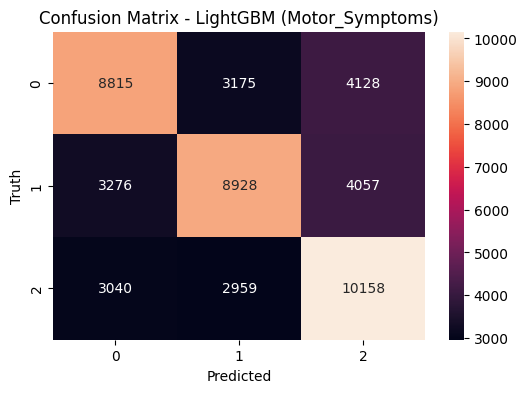


Training LightGBM for: Disease_Stage
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 48536, number of used features: 11
[LightGBM] [Info] Start training from score -1.394736
[LightGBM] [Info] Start training from score -1.395401
[LightGBM] [Info] Start training from score -1.373601
[LightGBM] [Info] Start training from score -1.381608


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.5317
Precision: 0.5352
Recall: 0.5317
F1 Score: 0.5314


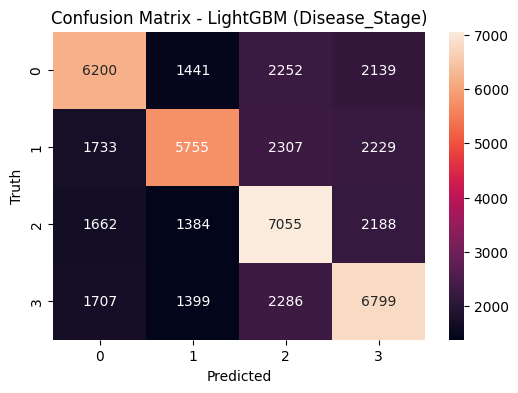


Training LightGBM for: Category
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 48536, number of used features: 11
[LightGBM] [Info] Start training from score -1.395069
[LightGBM] [Info] Start training from score -1.378496
[LightGBM] [Info] Start training from score -0.692694


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.5144
Precision: 0.7223
Recall: 0.5144
F1 Score: 0.3649


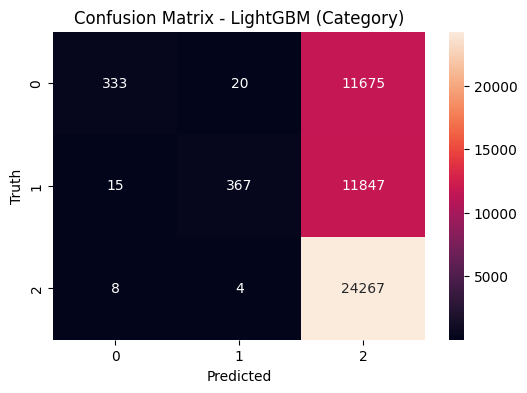


===== Comparison of Final Model Results =====
      Model          Target  Accuracy  Precision    Recall  F1 Score
0  LightGBM  Motor_Symptoms  0.574852   0.576400  0.574852  0.574368
1  LightGBM   Disease_Stage  0.531750   0.535243  0.531750  0.531442
2  LightGBM        Category  0.514402   0.722310  0.514402  0.364858

Per-Target Accuracy:
LightGBM - Motor_Symptoms: 57.49%
LightGBM - Disease_Stage: 53.17%
LightGBM - Category: 51.44%

Overall Dataset Accuracy (Average of all targets):
LightGBM: 54.03%


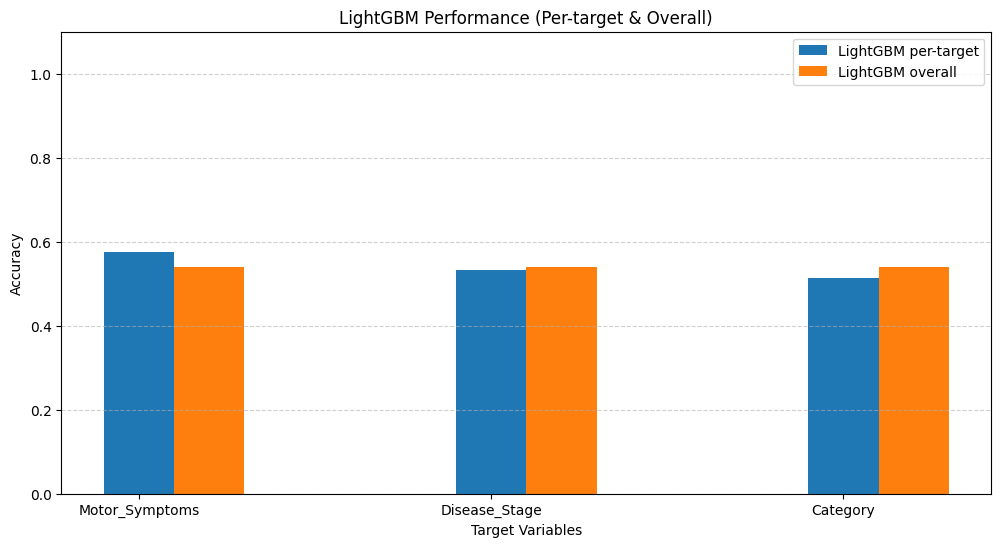

In [2]:
# libraries
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# install lightgbm
!pip install -U lightgbm

# upload and load dataset
uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/")

extracted_files = os.listdir("/content/")
csv_file = [f for f in extracted_files if f.endswith(".csv")][0]
csv_path = os.path.join("/content/", csv_file)

df = pd.read_csv(csv_path)
print("Dataset Loaded Successfully!\n")
print(df.head(), "\n")
print("Dataset Info:\n")
print(df.info(), "\n")

# cleaning
df = df.ffill()
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())

df = df.drop(columns=[
    "Patient_ID",
    "Function",
    "Effect",
    "Gene/Factor",
    "Chromosome_Location",
    "Random_Protein_Sequence",
    "Random_Gene_Sequence"
], errors='ignore')

# label encoding
label_encoders = {}
for col in df.select_dtypes(include="object"):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nMotor_Symptoms Categories Count:")
print(df["Motor_Symptoms"].value_counts())
print("\nDisease_Stage Categories Count:")
print(df["Disease_Stage"].value_counts())
print("\nCategory (Final Diagnosis) Count:")
print(df["Category"].value_counts())

# prepare features
X = df.drop(columns=["Motor_Symptoms","Disease_Stage","Category"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# import lightgbm
import lightgbm as lgb

results = []

# model function
def run_model(target, model_name):
    print("\n========================================")
    print(f"Training {model_name} for: {target}")
    print("========================================")

    y = df[target]

    if model_name == "LightGBM":
        model = lgb.LGBMClassifier(random_state=42)

    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {model_name} ({target})")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()

    results.append([model_name, target, acc, prec, rec, f1])

# run lightgbm model
run_model("Motor_Symptoms", "LightGBM")
run_model("Disease_Stage", "LightGBM")
run_model("Category", "LightGBM")

# final results
results_df = pd.DataFrame(results, columns=["Model", "Target", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n===== Comparison of Final Model Results =====")
print(results_df)

# per target accuracy
print("\nPer-Target Accuracy:")
for index, row in results_df.iterrows():
    print(f"{row['Model']} - {row['Target']}: {row['Accuracy']*100:.2f}%")

# overall accuracy
print("\nOverall Dataset Accuracy (Average of all targets):")
overall_acc_dict = {}
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    overall_dataset_acc = subset["Accuracy"].mean()
    overall_acc_dict[model] = overall_dataset_acc
    print(f"{model}: {overall_dataset_acc*100:.2f}%")

# performance graph
plt.figure(figsize=(12,6))
bar_width = 0.2
targets = results_df["Target"].unique()
positions = np.arange(len(targets))

subset = results_df[results_df["Model"] == "LightGBM"]
plt.bar(positions, subset["Accuracy"], width=bar_width, label="LightGBM per-target")

plt.bar(positions + bar_width, overall_acc_dict["LightGBM"], width=bar_width, label="LightGBM overall")

plt.xticks(positions, targets)
plt.title("LightGBM Performance (Per-target & Overall)")
plt.xlabel("Target Variables")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
